In [2]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering as ag_c
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [3]:
data=pd.read_csv('iris.csv')

In [4]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
setosa_sepal=data[data['Species']=='setosa'][['Sepal.Length','Sepal.Width']]
versicolor_sepal=data[data['Species']=='versicolor'][['Sepal.Length','Sepal.Width']]
virginica_sepal=data[data['Species']=='virginica'][['Sepal.Length','Sepal.Width']]

In [8]:
setosa_petal=data[data['Species']=='setosa'][['Petal.Length','Petal.Width']]
versicolor_petal=data[data['Species']=='versicolor'][['Petal.Length','Petal.Width']]
virginica_petal=data[data['Species']=='virginica'][['Petal.Length','Petal.Width']]

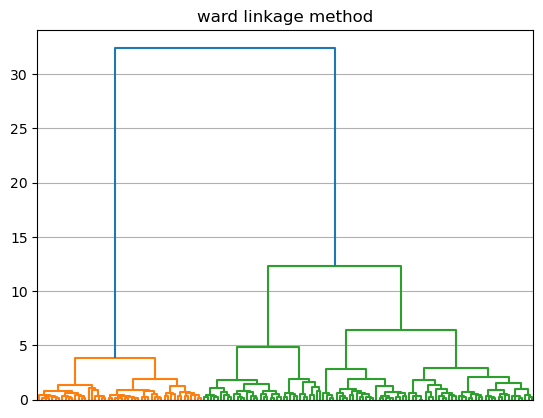

In [9]:
linkage_data_ward=sch.linkage(data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']],metric='euclidean',method='ward')
sch.dendrogram(linkage_data_ward,no_labels=True)
plt.grid(True)
plt.title('ward linkage method')
plt.show()

no of clusters:  3


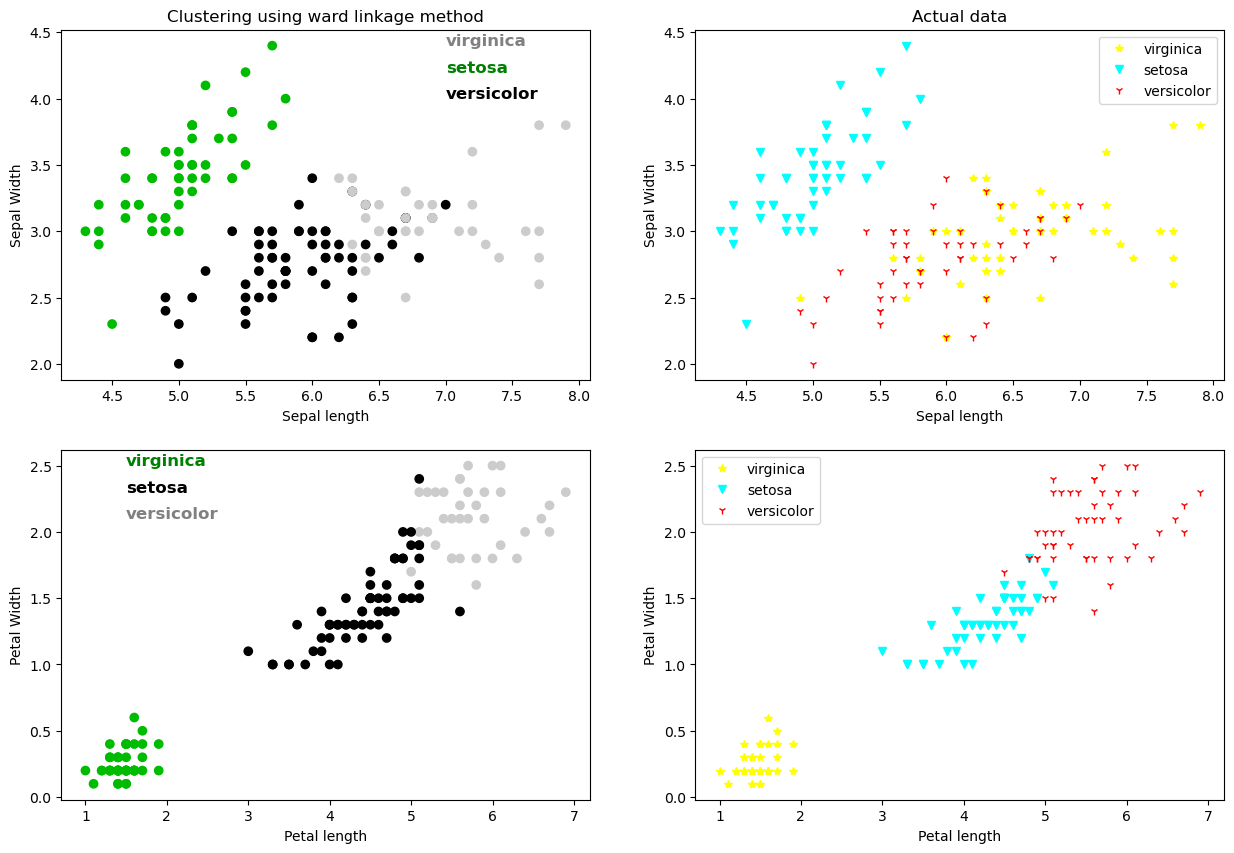

In [10]:
hc1=ag_c(metric='euclidean',linkage='ward',n_clusters=3)
labels1=hc1.fit_predict(data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']])

print('no of clusters: ',hc1.n_clusters_)

fig, axs=plt.subplots(2,2,figsize=[15,10])
axs[0,0].scatter(data['Sepal.Length'],data['Sepal.Width'],c=labels1,cmap='nipy_spectral')
axs[0,0].set_title('Clustering using ward linkage method')

axs[0,0].text(7, 4.4, "virginica", horizontalalignment='left', size='large', color='grey', weight='semibold')
axs[0,0].text(7, 4.2, "setosa", horizontalalignment='left', size='large', color='green', weight='semibold')
axs[0,0].text(7, 4, "versicolor", horizontalalignment='left', size='large', color='black', weight='semibold')

axs[0,1].plot(virginica_sepal['Sepal.Length'],virginica_sepal['Sepal.Width'],'*',color='yellow')
axs[0,1].plot(setosa_sepal['Sepal.Length'],setosa_sepal['Sepal.Width'],'v',color='cyan')
axs[0,1].plot(versicolor_sepal['Sepal.Length'],versicolor_sepal['Sepal.Width'],'1',color='red')
axs[0,1].legend(['virginica','setosa','versicolor'])
axs[0,1].set_title('Actual data')


axs[1,0].scatter(data['Petal.Length'],data['Petal.Width'],c=labels1,cmap='nipy_spectral')

axs[1,0].text(1.5, 2.5, "virginica", horizontalalignment='left', size='large', color='green', weight='semibold')
axs[1,0].text(1.5, 2.3, "setosa", horizontalalignment='left', size='large', color='black', weight='semibold')
axs[1,0].text(1.5, 2.1, "versicolor", horizontalalignment='left', size='large', color='grey', weight='semibold')

axs[1,1].plot(setosa_petal['Petal.Length'],setosa_petal['Petal.Width'],'*',color='yellow')
axs[1,1].plot(versicolor_petal['Petal.Length'],versicolor_petal['Petal.Width'],'v',color='cyan')
axs[1,1].plot(virginica_petal['Petal.Length'],virginica_petal['Petal.Width'],'1',color='red')
axs[1,1].legend(['virginica','setosa','versicolor'])



test=axs.flat
test[0].set(xlabel='Sepal length')
test[0].set(ylabel='Sepal Width')
test[1].set(xlabel='Sepal length')
test[1].set(ylabel='Sepal Width')
test[2].set(xlabel='Petal length')
test[2].set(ylabel='Petal Width')
test[3].set(xlabel='Petal length')
test[3].set(ylabel='Petal Width')

plt.show()

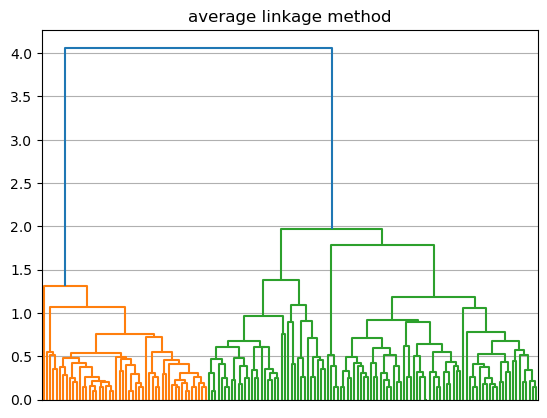

In [11]:
linkage_data_avg=sch.linkage(data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']],metric='euclidean',method='average')

sch.dendrogram(linkage_data_avg,no_labels=True)
plt.grid(True)
plt.title('average linkage method')
plt.show()

no of clusters:  3


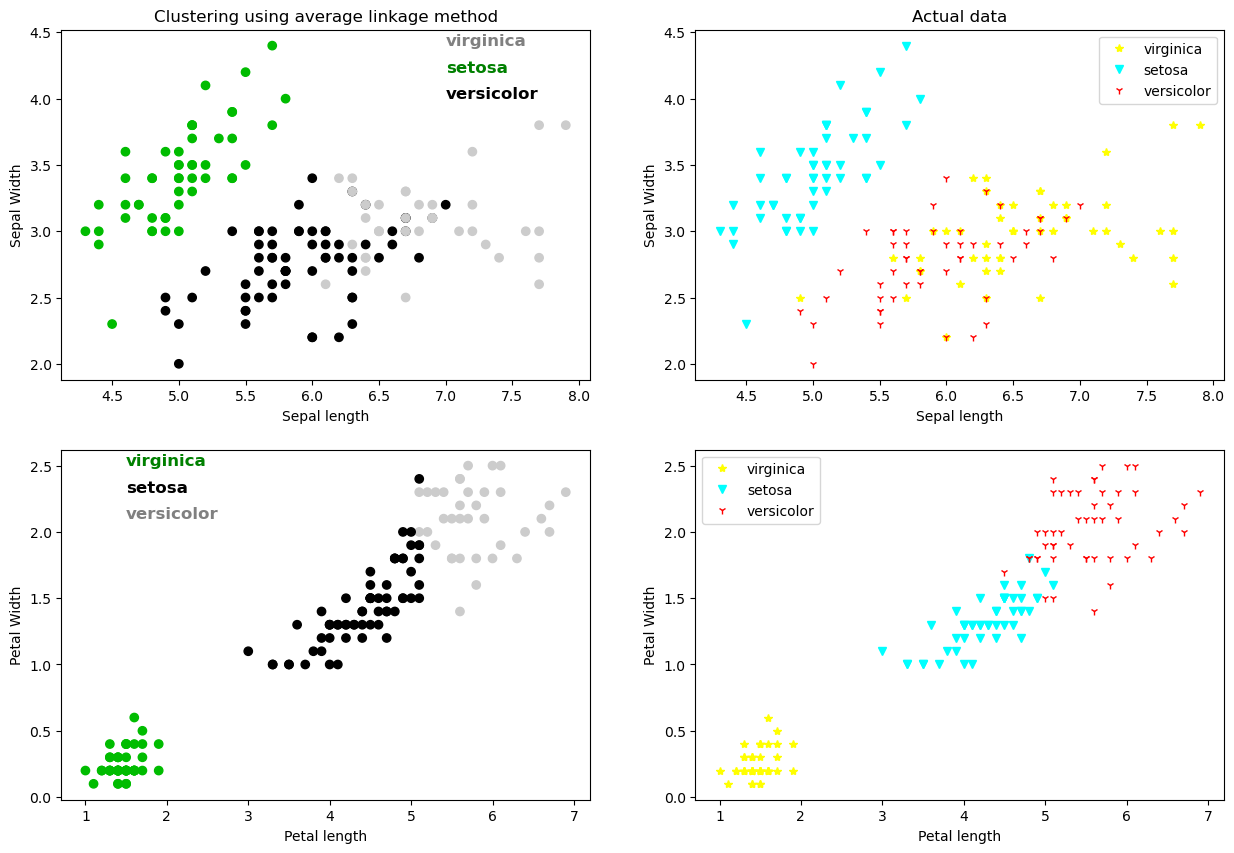

In [12]:
hc2=ag_c(distance_threshold=1.8,metric='euclidean',linkage='average',n_clusters=None)
labels2=hc2.fit_predict(data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']])

print('no of clusters: ',hc2.n_clusters_)
fig, axs=plt.subplots(2,2,figsize=[15,10])

axs[0,0].scatter(data['Sepal.Length'],data['Sepal.Width'],c=labels2,cmap='nipy_spectral')
axs[0,0].set_title('Clustering using average linkage method')

axs[0,0].text(7, 4.4, "virginica", horizontalalignment='left', size='large', color='grey', weight='semibold')
axs[0,0].text(7, 4.2, "setosa", horizontalalignment='left', size='large', color='green', weight='semibold')
axs[0,0].text(7, 4, "versicolor", horizontalalignment='left', size='large', color='black', weight='semibold')


axs[0,1].plot(virginica_sepal['Sepal.Length'],virginica_sepal['Sepal.Width'],'*',color='yellow')
axs[0,1].plot(setosa_sepal['Sepal.Length'],setosa_sepal['Sepal.Width'],'v',color='cyan')
axs[0,1].plot(versicolor_sepal['Sepal.Length'],versicolor_sepal['Sepal.Width'],'1',color='red')
axs[0,1].legend(['virginica','setosa','versicolor'])
axs[0,1].set_title('Actual data')


axs[1,0].scatter(data['Petal.Length'],data['Petal.Width'],c=labels2,cmap='nipy_spectral')

axs[1,0].text(1.5, 2.5, "virginica", horizontalalignment='left', size='large', color='green', weight='semibold')
axs[1,0].text(1.5, 2.3, "setosa", horizontalalignment='left', size='large', color='black', weight='semibold')
axs[1,0].text(1.5, 2.1, "versicolor", horizontalalignment='left', size='large', color='grey', weight='semibold')

axs[1,1].plot(setosa_petal['Petal.Length'],setosa_petal['Petal.Width'],'*',color='yellow')
axs[1,1].plot(versicolor_petal['Petal.Length'],versicolor_petal['Petal.Width'],'v',color='cyan')
axs[1,1].plot(virginica_petal['Petal.Length'],virginica_petal['Petal.Width'],'1',color='red')
axs[1,1].legend(['virginica','setosa','versicolor'])

test=axs.flat
test[0].set(xlabel='Sepal length')
test[0].set(ylabel='Sepal Width')
test[1].set(xlabel='Sepal length')
test[1].set(ylabel='Sepal Width')
test[2].set(xlabel='Petal length')
test[2].set(ylabel='Petal Width')
test[3].set(xlabel='Petal length')
test[3].set(ylabel='Petal Width')

plt.show()

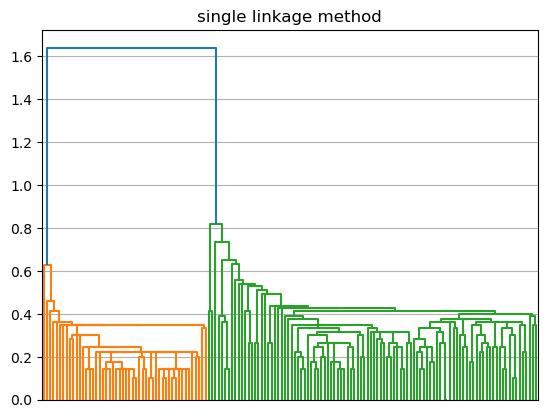

In [13]:
linkage_data_single=sch.linkage(data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']],metric='euclidean',method='single')

sch.dendrogram(linkage_data_single,no_labels=True)
plt.grid(True)
plt.title('single linkage method')
plt.show()

no of clusters:  3


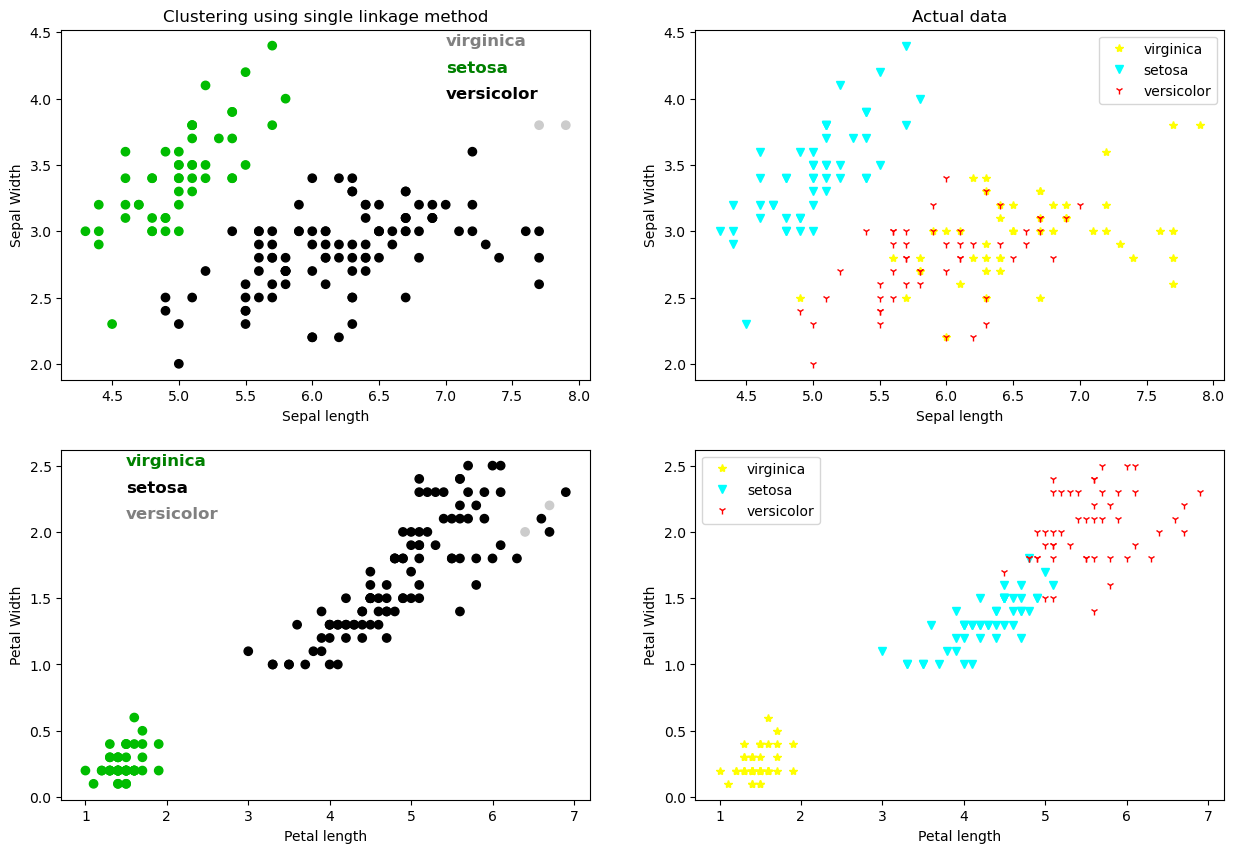

In [14]:
hc3=ag_c(distance_threshold=0.8,metric='euclidean',linkage='single',n_clusters=None)
labels3=hc3.fit_predict(data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']])

print('no of clusters: ',hc3.n_clusters_)
fig, axs=plt.subplots(2,2,figsize=[15,10])

axs[0,0].scatter(data['Sepal.Length'],data['Sepal.Width'],c=labels3,cmap='nipy_spectral')
axs[0,0].set_title('Clustering using single linkage method')

axs[0,0].text(7, 4.4, "virginica", horizontalalignment='left', size='large', color='grey', weight='semibold')
axs[0,0].text(7, 4.2, "setosa", horizontalalignment='left', size='large', color='green', weight='semibold')
axs[0,0].text(7, 4, "versicolor", horizontalalignment='left', size='large', color='black', weight='semibold')


axs[0,1].plot(virginica_sepal['Sepal.Length'],virginica_sepal['Sepal.Width'],'*',color='yellow')
axs[0,1].plot(setosa_sepal['Sepal.Length'],setosa_sepal['Sepal.Width'],'v',color='cyan')
axs[0,1].plot(versicolor_sepal['Sepal.Length'],versicolor_sepal['Sepal.Width'],'1',color='red')
axs[0,1].legend(['virginica','setosa','versicolor'])
axs[0,1].set_title('Actual data')

axs[1,0].scatter(data['Petal.Length'],data['Petal.Width'],c=labels3,cmap='nipy_spectral')

axs[1,0].text(1.5, 2.5, "virginica", horizontalalignment='left', size='large', color='green', weight='semibold')
axs[1,0].text(1.5, 2.3, "setosa", horizontalalignment='left', size='large', color='black', weight='semibold')
axs[1,0].text(1.5, 2.1, "versicolor", horizontalalignment='left', size='large', color='grey', weight='semibold')

axs[1,1].plot(setosa_petal['Petal.Length'],setosa_petal['Petal.Width'],'*',color='yellow')
axs[1,1].plot(versicolor_petal['Petal.Length'],versicolor_petal['Petal.Width'],'v',color='cyan')
axs[1,1].plot(virginica_petal['Petal.Length'],virginica_petal['Petal.Width'],'1',color='red')
axs[1,1].legend(['virginica','setosa','versicolor'])


test=axs.flat
test[0].set(xlabel='Sepal length')
test[0].set(ylabel='Sepal Width')
test[1].set(xlabel='Sepal length')
test[1].set(ylabel='Sepal Width')
test[2].set(xlabel='Petal length')
test[2].set(ylabel='Petal Width')
test[3].set(xlabel='Petal length')
test[3].set(ylabel='Petal Width')

plt.show()

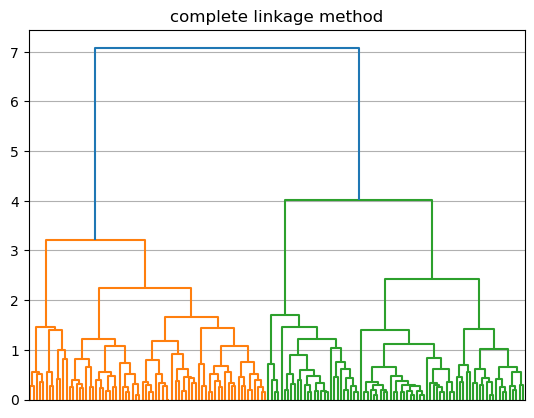

In [15]:
linkage_data_comp=sch.linkage(data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']],metric='euclidean',method='complete')

sch.dendrogram(linkage_data_comp,no_labels=True)
plt.grid(True)
plt.title('complete linkage method')
plt.show()

no of clusters:  3


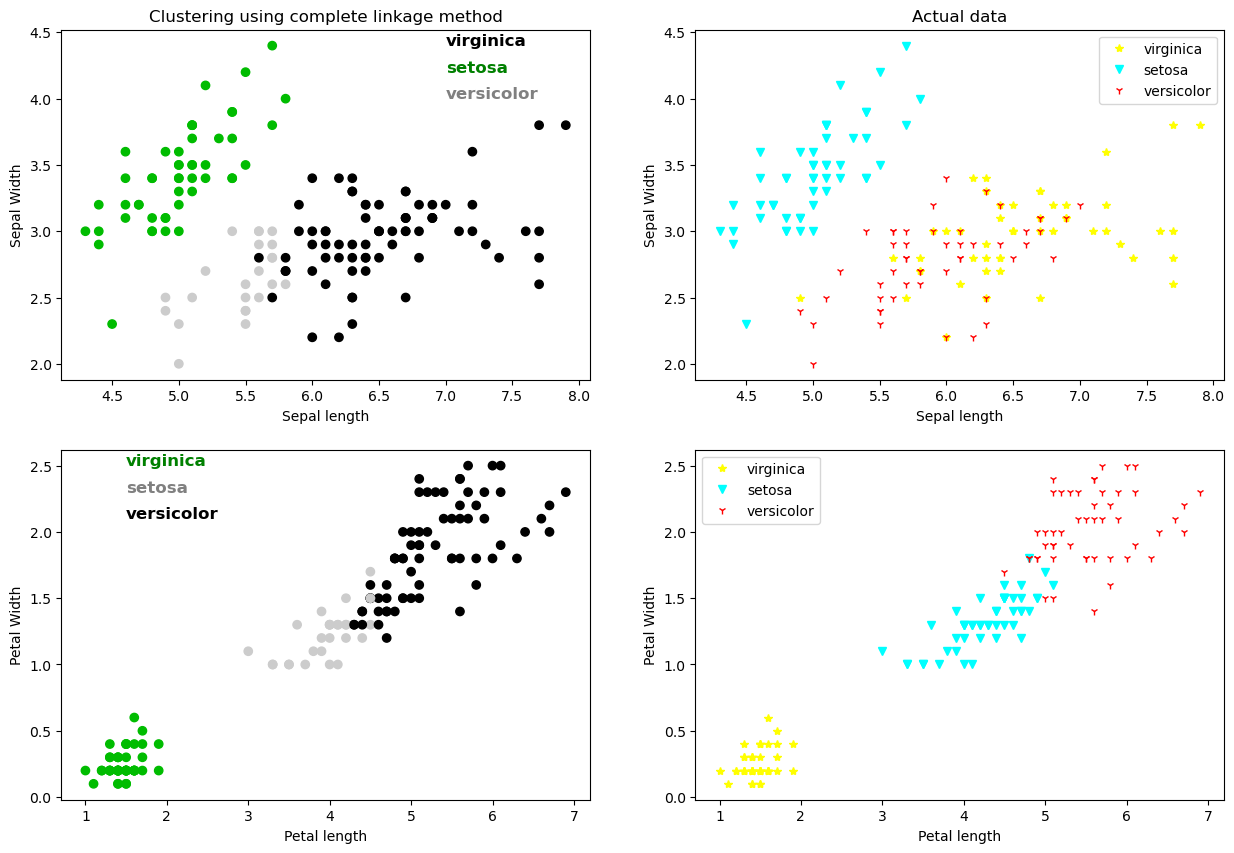

In [16]:
hc4=ag_c(distance_threshold=4,metric='euclidean',linkage='complete',n_clusters=None)
labels4=hc4.fit_predict(data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']])

print('no of clusters: ',hc4.n_clusters_)
fig, axs=plt.subplots(2,2,figsize=[15,10])

axs[0,0].scatter(data['Sepal.Length'],data['Sepal.Width'],c=labels4,cmap='nipy_spectral',label=['setosa','verginica','versicolor'])
axs[0,0].set_title('Clustering using complete linkage method')


axs[0,0].text(7, 4.4, "virginica", horizontalalignment='left', size='large', color='black', weight='semibold')
axs[0,0].text(7, 4.2, "setosa", horizontalalignment='left', size='large', color='green', weight='semibold')
axs[0,0].text(7, 4, "versicolor", horizontalalignment='left', size='large', color='grey', weight='semibold')



axs[0,1].plot(virginica_sepal['Sepal.Length'],virginica_sepal['Sepal.Width'],'*',color='yellow')
axs[0,1].plot(setosa_sepal['Sepal.Length'],setosa_sepal['Sepal.Width'],'v',color='cyan')
axs[0,1].plot(versicolor_sepal['Sepal.Length'],versicolor_sepal['Sepal.Width'],'1',color='red')
axs[0,1].legend(['virginica','setosa','versicolor'])
axs[0,1].set_title('Actual data')


axs[1,0].scatter(data['Petal.Length'],data['Petal.Width'],c=labels4,cmap='nipy_spectral')

axs[1,0].text(1.5, 2.5, "virginica", horizontalalignment='left', size='large', color='green', weight='semibold')
axs[1,0].text(1.5, 2.3, "setosa", horizontalalignment='left', size='large', color='grey', weight='semibold')
axs[1,0].text(1.5, 2.1, "versicolor", horizontalalignment='left', size='large', color='black', weight='semibold')

axs[1,1].plot(setosa_petal['Petal.Length'],setosa_petal['Petal.Width'],'*',color='yellow')
axs[1,1].plot(versicolor_petal['Petal.Length'],versicolor_petal['Petal.Width'],'v',color='cyan')
axs[1,1].plot(virginica_petal['Petal.Length'],virginica_petal['Petal.Width'],'1',color='red')
axs[1,1].legend(['virginica','setosa','versicolor'])



test=axs.flat
test[0].set(xlabel='Sepal length')
test[0].set(ylabel='Sepal Width')
test[1].set(xlabel='Sepal length')
test[1].set(ylabel='Sepal Width')
test[2].set(xlabel='Petal length')
test[2].set(ylabel='Petal Width')
test[3].set(xlabel='Petal length')
test[3].set(ylabel='Petal Width')

plt.show()

In [17]:
from sklearn.metrics import silhouette_score
def score_cal(model):
    temp_data=data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
    score = silhouette_score(temp_data,
                                 model.labels_,
                                 metric='euclidean')
    return score

Text(0.5, 1.0, 'silhouette Scores of different linkage methods')

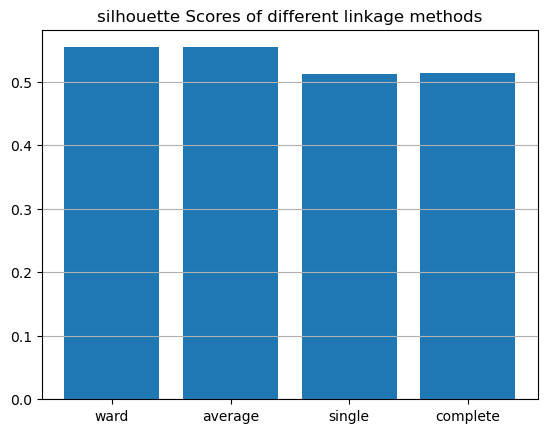

In [31]:
plt.bar(['ward','average','single','complete'],[score_cal(hc1),score_cal(hc2),score_cal(hc3),score_cal(hc4)])
plt.grid(True,axis='y')
plt.title('silhouette Scores of different linkage methods')

## Distance metrics

In [19]:
from scipy.spatial import distance

In [20]:
distance.euclidean([2,2],[5,9])

7.615773105863909

In [21]:
def euclidean_distance(a,b):
    if len(a)==len(b):
        dis=0
        for i in range(len(a)):
            dis+=(a[i]-b[i])**2
        return dis**(1/2)
euclidean_distance([2,2],[5,9])

7.615773105863909

In [22]:
distance.cityblock([2,2],[5,9])

10

In [23]:
def manhattan_distance(a,b):
    if len(a)==len(b):
        dis=0
        for i in range(len(a)):
            dis+=abs(a[i]-b[i])
        return dis

In [24]:
manhattan_distance([2,2],[5,9])

10

In [25]:
distance.cosine([2,2],[5,9])

0.03847605235917684

In [26]:
def cosine_distance(a,b):
    if len(a)==len(b):
        dot=0
        for i in range(len(a)):
            dot+=(a[i]*b[i])
        
        # print(dot)
        mag_a=0
        for i in a:
            mag_a+=i**2
        mag_a=mag_a**(1/2)
        # print(mag_a)
        mag_b=0
        for i in b:
            mag_b+=i**2
        mag_b=mag_b**(1/2)
        # print(mag_b)
        return 1-dot/(mag_a*mag_b)

In [27]:
cosine_distance([2,2],[5,9])

0.03847605235917695

### l1 norm is same as manhattan distance and l2 norm is same as euclidean distance.

## Distance Matrix:

In [28]:
from scipy.spatial import distance_matrix
ziped_coord=list(zip(list(data['Sepal.Length']),list(data['Sepal.Width'])))
dis_matrix=distance_matrix(ziped_coord,ziped_coord)
print(dis_matrix)

[[0.         0.53851648 0.5        ... 1.48660687 1.1045361  0.94339811]
 [0.53851648 0.         0.28284271 ... 1.6        1.36014705 1.        ]
 [0.5        0.28284271 0.         ... 1.81107703 1.5132746  1.21655251]
 ...
 [1.48660687 1.6        1.81107703 ... 0.         0.5        0.6       ]
 [1.1045361  1.36014705 1.5132746  ... 0.5        0.         0.5       ]
 [0.94339811 1.         1.21655251 ... 0.6        0.5        0.        ]]


## Using differnet distance metric

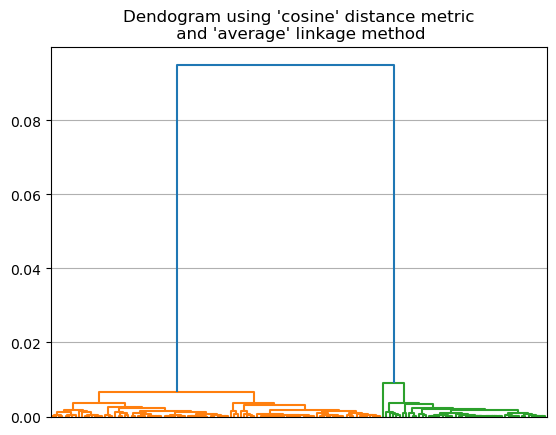

In [29]:
linkage_data_average_cosine=sch.linkage(data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']],metric='cosine',method='average')
sch.dendrogram(linkage_data_average_cosine,no_labels=True)
plt.title("Dendogram using 'cosine' distance metric\n and 'average' linkage method")
plt.grid(True)
plt.show()

no of clusters:  3


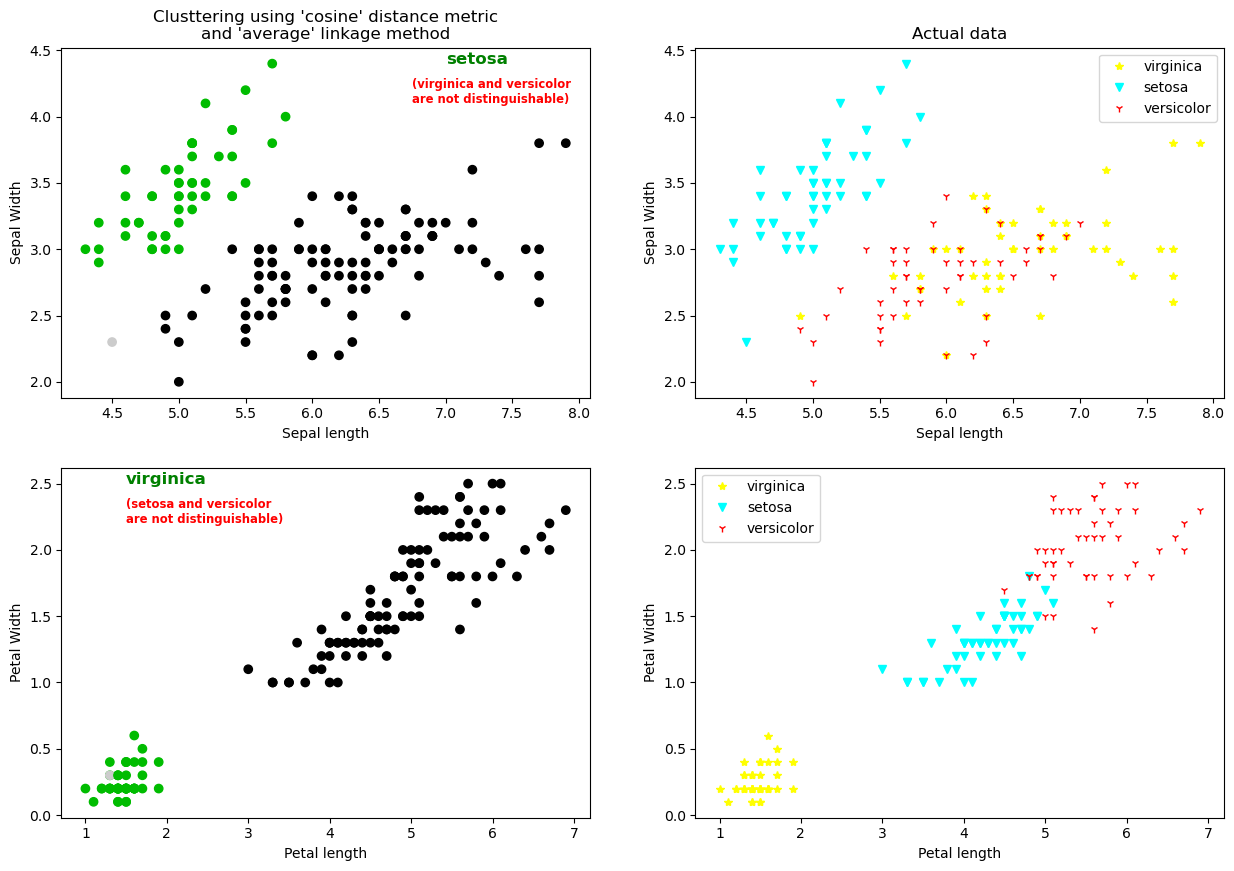

In [50]:
hc6=ag_c(metric='cosine',linkage='average',n_clusters=3)
labels6=hc6.fit_predict(data[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']])

print('no of clusters: ',hc6.n_clusters_)
fig, axs=plt.subplots(2,2,figsize=[15,10])
axs[0,0].scatter(data['Sepal.Length'],data['Sepal.Width'],c=labels6,cmap='nipy_spectral')
axs[0,0].set_title("Clusttering using 'cosine' distance metric\nand 'average' linkage method")

axs[0,0].text(7, 4.4, "setosa", horizontalalignment='left', size='large', color='green', weight='semibold')
axs[0,0].text(6.75, 4.1, "(virginica and versicolor \nare not distinguishable)", horizontalalignment='left', size='small', color='red', weight='semibold')


axs[0,1].plot(virginica_sepal['Sepal.Length'],virginica_sepal['Sepal.Width'],'*',color='yellow')
axs[0,1].plot(setosa_sepal['Sepal.Length'],setosa_sepal['Sepal.Width'],'v',color='cyan')
axs[0,1].plot(versicolor_sepal['Sepal.Length'],versicolor_sepal['Sepal.Width'],'1',color='red')
axs[0,1].legend(['virginica','setosa','versicolor'])
axs[0,1].set_title('Actual data')

axs[1,0].scatter(data['Petal.Length'],data['Petal.Width'],c=labels6,cmap='nipy_spectral')

axs[1,0].text(1.5, 2.5, "virginica", horizontalalignment='left', size='large', color='green', weight='semibold')
axs[1,0].text(1.5, 2.2, "(setosa and versicolor \nare not distinguishable)", horizontalalignment='left', size='small', color='red', weight='semibold')\

axs[1,1].plot(setosa_petal['Petal.Length'],setosa_petal['Petal.Width'],'*',color='yellow')
axs[1,1].plot(versicolor_petal['Petal.Length'],versicolor_petal['Petal.Width'],'v',color='cyan')
axs[1,1].plot(virginica_petal['Petal.Length'],virginica_petal['Petal.Width'],'1',color='red')
axs[1,1].legend(['virginica','setosa','versicolor'])

test=axs.flat
test[0].set(xlabel='Sepal length')
test[0].set(ylabel='Sepal Width')
test[1].set(xlabel='Sepal length')
test[1].set(ylabel='Sepal Width')
test[2].set(xlabel='Petal length')
test[2].set(ylabel='Petal Width')
test[3].set(xlabel='Petal length')
test[3].set(ylabel='Petal Width')
plt.show()